# Setup

In [16]:
import torch
import pandas as pd

import sys
assert sys.version_info >= (3, 5)


import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import os

import os
import tarfile
import urllib

from rdkit.Chem import PandasTools
from rdkit import DataStructs

%matplotlib inline

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs

# Retrieve Dataset and Isolate One Set of Toxicity Data - SR-ARE

In [2]:
tox21_raw = pd.read_csv("datasets/molecule/tox21.csv")
tox21_raw

,cano_smiles,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,group
0,s1c2cc(OCC)ccc2nc1S(=O)(=O)N,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,train
1,O[C@]1(CC[C@H]2[C@H]3[C@@H]([C@@H]4C(CC3)=CCCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,train
2,O=C(Nc1c(cccc1C)C)C(N(CCC)CC)CC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,train
3,P(O)(O)(=O)C(P(O)(O)=O)(O)C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,O(OC(C)(C)C)C(CCC(OOC(C)(C)C)(C)C)(C)C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,O=C1N(CC(O)=O)C(=O)c2c3c1cccc3ccc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,valid
7807,Clc1cc(OC(F)(F)C(F)C(F)(F)F)c(Cl)cc1NC(=O)NC(=...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,valid
7808,O1c2c(N(c3cc(nnc13)N1CCN(CC1)C)C)cccc2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,valid
7809,S=P(Oc1ccccc1C(OC(C)C)=O)(OCC)NC(C)C,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,valid


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc5c082050>,
      dtype=object)

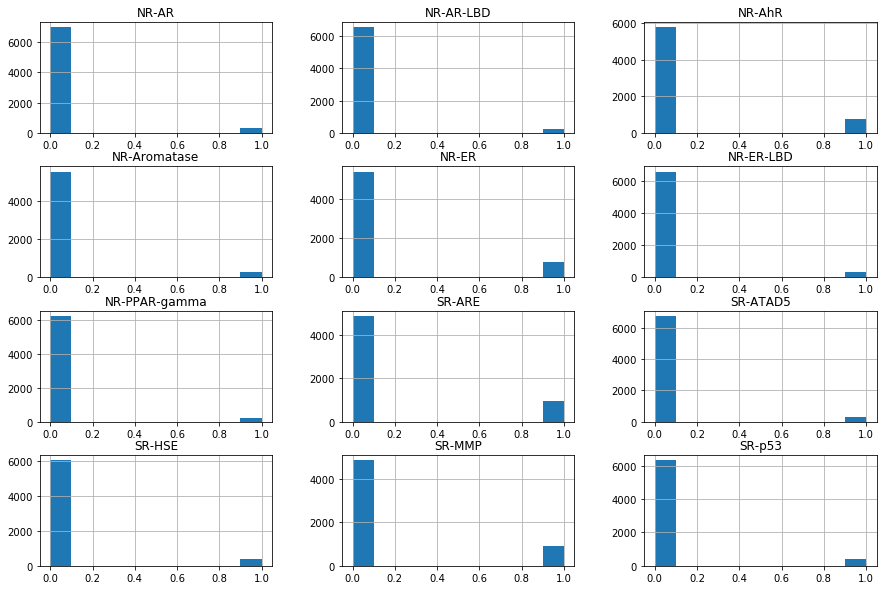

In [3]:
tox21_raw.hist(figsize=(15, 10))

In [7]:
tox21_sr_are = tox21_raw[["SR-ARE", "cano_smiles", "group"]]
print("Number of datapoints before drop NaNs: ", tox21_sr_are.shape[0])
tox21 = tox21_sr_are.dropna()
print("Number of datapoints after drop NaNs: ", tox21_sr_are_processed.shape[0])

Number of datapoints before drop NaNs:  7811
Number of datapoints after drop NaNs:  5816


# Generate Molecules 

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/rdkit/Chem/PandasTools.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,SR-ARE,cano_smiles,group,Molecule
0,1.0,s1c2cc(OCC)ccc2nc1S(=O)(=O)N,train,
1,0.0,O[C@]1(CC[C@H]2[C@H]3[C@@H]([C@@H]4C(CC3)=CCCC...,train,
3,0.0,P(O)(O)(=O)C(P(O)(O)=O)(O)C,train,
5,0.0,ClS(=O)(=O)c1ccccc1,train,
6,1.0,Ic1cc(cc(I)c1Oc1cc(I)c(O)cc1)CC(O)=O,train,

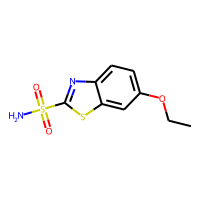
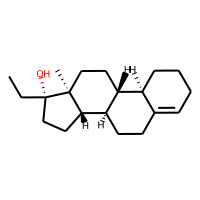
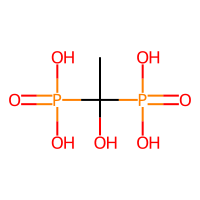
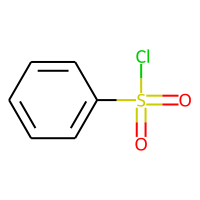
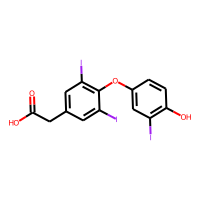

In [11]:
# Create Mol rdkit objects for each smile
PandasTools.AddMoleculeColumnToFrame(frame=tox21, smilesCol='cano_smiles', molCol='Molecule')
tox21.head()

In [13]:
tox21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 7810
Data columns (total 4 columns):
SR-ARE         5816 non-null float64
cano_smiles    5816 non-null object
group          5816 non-null object
Molecule       5816 non-null object
dtypes: float64(1), object(3)
memory usage: 227.2+ KB


# Generate Morgan Fingerprints

In [17]:
#create a column for Morgan fingerprints
n_Bits = 2048
tox21["MorgFP"] = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits = n_Bits, useFeatures=True) for m in tox21['Molecule']]

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Generate Descriptors 

In [18]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
descriptors = list(np.array(Descriptors._descList)[:,0])
print(np.array(Descriptors._descList)[:,0])

['MaxEStateIndex' 'MinEStateIndex' 'MaxAbsEStateIndex' 'MinAbsEStateIndex'
 'qed' 'MolWt' 'HeavyAtomMolWt' 'ExactMolWt' 'NumValenceElectrons'
 'NumRadicalElectrons' 'MaxPartialCharge' 'MinPartialCharge'
 'MaxAbsPartialCharge' 'MinAbsPartialCharge' 'FpDensityMorgan1'
 'FpDensityMorgan2' 'FpDensityMorgan3' 'BCUT2D_MWHI' 'BCUT2D_MWLOW'
 'BCUT2D_CHGHI' 'BCUT2D_CHGLO' 'BCUT2D_LOGPHI' 'BCUT2D_LOGPLOW'
 'BCUT2D_MRHI' 'BCUT2D_MRLOW' 'BalabanJ' 'BertzCT' 'Chi0' 'Chi0n' 'Chi0v'
 'Chi1' 'Chi1n' 'Chi1v' 'Chi2n' 'Chi2v' 'Chi3n' 'Chi3v' 'Chi4n' 'Chi4v'
 'HallKierAlpha' 'Ipc' 'Kappa1' 'Kappa2' 'Kappa3' 'LabuteASA' 'PEOE_VSA1'
 'PEOE_VSA10' 'PEOE_VSA11' 'PEOE_VSA12' 'PEOE_VSA13' 'PEOE_VSA14'
 'PEOE_VSA2' 'PEOE_VSA3' 'PEOE_VSA4' 'PEOE_VSA5' 'PEOE_VSA6' 'PEOE_VSA7'
 'PEOE_VSA8' 'PEOE_VSA9' 'SMR_VSA1' 'SMR_VSA10' 'SMR_VSA2' 'SMR_VSA3'
 'SMR_VSA4' 'SMR_VSA5' 'SMR_VSA6' 'SMR_VSA7' 'SMR_VSA8' 'SMR_VSA9'
 'SlogP_VSA1' 'SlogP_VSA10' 'SlogP_VSA11' 'SlogP_VSA12' 'SlogP_VSA2'
 'SlogP_VSA3' 'SlogP_VSA4' 'SlogP_VS

In [19]:
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors)
# Define a custom function to calculate molecular descriptors
def computeDescriptors(mol, calculator):
    res = list(calculator.CalcDescriptors(mol))
    if not np.all(np.isfinite(res)):
        return None  
# Make it's easier to identify problematic molecules (e.g.: infinty descriptor values) later 
    return res

# Compute the descriptors
tox21['Descriptors'] = tox21['Molecule'].map(lambda x: computeDescriptors(x,calculator))
# Remove rows with non-finite descriptor values (seems to be only 1 by comparing the counts)
tox21 = tox21[tox21['Descriptors'].map(lambda x: x is not None)]

df_descriptors = pd.DataFrame(descriptors, columns=['desc_name'])
df_descriptors

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,desc_name
0,MaxEStateIndex
1,MinEStateIndex
2,MaxAbsEStateIndex
3,MinAbsEStateIndex
4,qed
...,...
203,fr_thiazole
204,fr_thiocyan
205,fr_thiophene
206,fr_unbrch_alkane


In [21]:
desc_name = [df_descriptors['desc_name'][i] for i in range(len(df_descriptors))]
desc_val = [list(l) for l in tox21['Descriptors']]
df_desc = pd.DataFrame(desc_val, index = tox21.index, columns=desc_name)

tox21 = pd.concat([tox21, df_desc], axis= 1, ignore_index=False)

df_desc.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.107593,-3.723219,11.107593,0.073011,0.900283,258.324,248.244,258.013284,86,0,...,0,1,0,0,0,1,0,0,0,0
1,11.165775,-0.369724,11.165775,0.207144,0.666269,288.475,256.219,288.245316,118,0,...,0,0,0,0,0,0,0,0,0,0
3,10.251875,-5.197724,10.251875,0.383488,0.365583,206.027,197.963,205.974526,68,0,...,0,0,0,0,0,0,0,0,0,0
5,10.598302,-3.530602,10.598302,0.135802,0.609724,176.624,171.584,175.969878,54,0,...,0,0,0,0,0,0,0,0,0,0
6,10.775986,-0.858003,10.775986,0.010525,0.489304,621.934,612.862,621.763503,110,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
tox21.shape

(5734, 214)

In [24]:
#Finds Null data in any row if any
sample_incomplete_rows = tox21[tox21.isnull().any(axis=1)]
sample_incomplete_rows.head(len(sample_incomplete_rows))

,SR-ARE,cano_smiles,group,Molecule,MorgFP,Descriptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea


In [26]:
#Returns number of unique values in the specifed column to make sure that no duplications there
tox21['cano_smiles'].nunique()

5731

In [27]:
tox21['cano_smiles'].count()

5734

In [28]:
tox21 = tox21.drop_duplicates(subset='cano_smiles', keep='first')
tox21['cano_smiles'].count()

5731

In [29]:
tox21.describe()

,SR-ARE,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,...,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.00000,5731.000000,5731.000000
mean,0.158088,9.625370,-0.724984,9.625370,0.361500,0.557334,245.177064,229.056978,244.833499,90.386320,...,0.032804,0.034200,0.006282,0.005235,0.002792,0.011865,0.001221,0.01012,0.617868,0.029663
std,0.364855,3.070199,1.566256,3.070199,0.489890,0.173928,134.590583,128.168221,134.431114,48.130184,...,0.194080,0.199168,0.083315,0.072168,0.052769,0.109889,0.034931,0.11319,2.147572,0.184456
min,0.000000,1.500000,-9.769375,1.500000,0.000000,0.012914,30.026000,28.010000,30.010565,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,8.366551,-1.061277,8.366551,0.078769,0.443206,153.141000,142.093000,153.042593,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,10.518100,-0.369600,10.518100,0.206258,0.555006,214.393000,200.174000,214.088832,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,11.766582,0.221099,11.766582,0.474391,0.684759,307.685500,288.181000,307.178358,112.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,17.291804,4.000000,17.291804,8.764932,0.944994,1950.681000,1904.313000,1949.500417,632.000000,...,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.00000,35.000000,4.000000


,SR-ARE,cano_smiles,group,Molecule,MorgFP,Descriptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,s1c2cc(OCC)ccc2nc1S(=O)(=O)N,train,,"[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11.107593458679768, -3.723219416624674, 11.10...",11.107593,-3.723219,11.107593,0.073011,...,0,1,0,0,0,1,0,0,0,0
1,0.0,O[C@]1(CC[C@H]2[C@H]3[C@@H]([C@@H]4C(CC3)=CCCC...,train,,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11.165774675610987, -0.36972426933736435, 11....",11.165775,-0.369724,11.165775,0.207144,...,0,0,0,0,0,0,0,0,0,0
3,0.0,P(O)(O)(=O)C(P(O)(O)=O)(O)C,train,,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10.251875, -5.1977237654321, 10.251875, 0.383...",10.251875,-5.197724,10.251875,0.383488,...,0,0,0,0,0,0,0,0,0,0
5,0.0,ClS(=O)(=O)c1ccccc1,train,,"[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[10.598302469135803, -3.5306018518518507, 10.5...",10.598302,-3.530602,10.598302,0.135802,...,0,0,0,0,0,0,0,0,0,0
6,1.0,Ic1cc(cc(I)c1Oc1cc(I)c(O)cc1)CC(O)=O,train,,"[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[10.775986052193767, -0.8580030862462318, 10.7...",10.775986,-0.858003,10.775986,0.010525,...,0,0,0,0,0,0,0,0,0,0

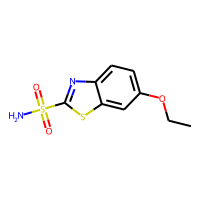
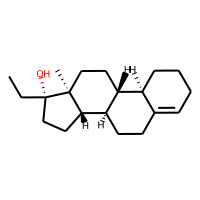
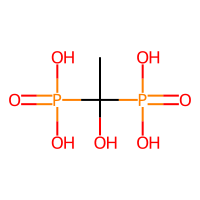
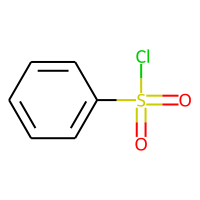
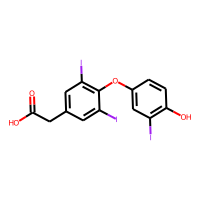

In [30]:
tox21.head()

# Split Data

In [31]:
train_data = tox21[tox21["group"]=="train"]
valid_data = tox21[tox21["group"]=="valid"]
test_data = tox21[tox21["group"]=="test"]

,SR-ARE,cano_smiles,group,Molecule,MorgFP,Descriptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,s1c2cc(OCC)ccc2nc1S(=O)(=O)N,train,,"[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11.107593458679768, -3.723219416624674, 11.10...",11.107593,-3.723219,11.107593,0.073011,...,0,1,0,0,0,1,0,0,0,0
1,0.0,O[C@]1(CC[C@H]2[C@H]3[C@@H]([C@@H]4C(CC3)=CCCC...,train,,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11.165774675610987, -0.36972426933736435, 11....",11.165775,-0.369724,11.165775,0.207144,...,0,0,0,0,0,0,0,0,0,0
3,0.0,P(O)(O)(=O)C(P(O)(O)=O)(O)C,train,,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10.251875, -5.1977237654321, 10.251875, 0.383...",10.251875,-5.197724,10.251875,0.383488,...,0,0,0,0,0,0,0,0,0,0
5,0.0,ClS(=O)(=O)c1ccccc1,train,,"[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[10.598302469135803, -3.5306018518518507, 10.5...",10.598302,-3.530602,10.598302,0.135802,...,0,0,0,0,0,0,0,0,0,0
6,1.0,Ic1cc(cc(I)c1Oc1cc(I)c(O)cc1)CC(O)=O,train,,"[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[10.775986052193767, -0.8580030862462318, 10.7...",10.775986,-0.858003,10.775986,0.010525,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,0.0,O=C1N(CCCCC(=O)C)C(=O)N(c2ncn(c12)CCC)C,train,,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12.608190035273369, -0.359191232048375, 12.60...",12.608190,-0.359191,12.608190,0.121966,...,0,0,0,0,0,0,0,0,1,0
6240,0.0,O=C1N(C=C(C=C1)C)c1ccccc1,train,,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11.534818594104308, 0.0016666666666669272, 11...",11.534819,0.001667,11.534819,0.001667,...,0,0,0,0,0,0,0,0,0,0
6245,0.0,O(CC)c1nc2c(n1Cc1ccc(cc1)-c1ccccc1-c1[nH]nnn1)...,train,,"[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[11.81910704085061, -1.0012415034137059, 11.81...",11.819107,-1.001242,11.819107,0.191822,...,0,0,0,0,1,0,0,0,0,0
6247,0.0,Oc1cc2CC[C@H]3[C@@H]4CC[C@@H](O)[C@]4(CC[C@@H]...,train,,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10.372486615016378, -0.08827338960275544, 10....",10.372487,-0.088273,10.372487,0.088273,...,0,0,0,0,0,0,0,0,0,0

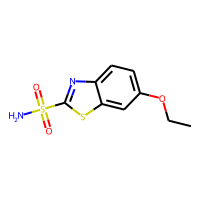
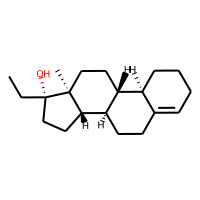
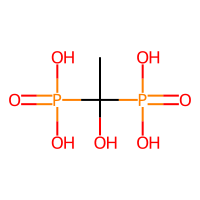
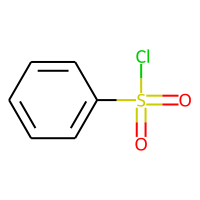
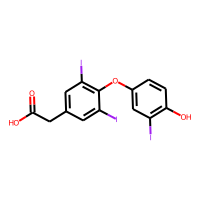
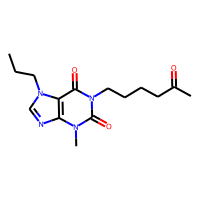
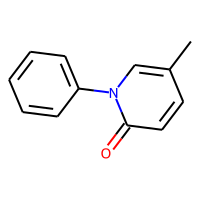
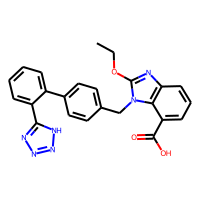
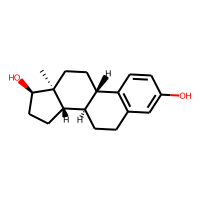
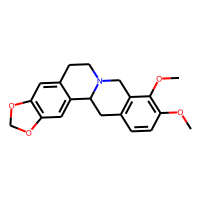

In [33]:
train_data

# Random Forest Regression with Default Parameters and Morgan Fingerprints 

## Preprocess the Data 

In [39]:
X_train = train_data["MorgFP"].values
X_valid = valid_data["MorgFP"].values
X_test = test_data["MorgFP"].values

y_train = train_data["SR-ARE"].values
y_valid = valid_data["SR-ARE"].values
y_test = test_data["SR-ARE"].values

In [40]:
def convert_to_Numpy(column):
    col_np = []
    for fp in column:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        col_np.append(arr)
    return col_np

In [41]:
X_train = convert_to_Numpy(X_train)
X_test = convert_to_Numpy(X_test)
X_valid = convert_to_Numpy(X_valid)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

In [42]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))
print(type(X_valid))
print(type(y_valid))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

## Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
forest_reg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## RMSE Values 

### Training Dataset 

In [46]:
from sklearn.metrics import mean_squared_error

y_train_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.15319907123509235

### Validation Dataset 

In [47]:
from sklearn.metrics import mean_squared_error

y_valid_pred = forest_reg.predict(X_valid)
forest_mse = mean_squared_error(y_valid, y_valid_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.30273275161181507

### Test Dataset 

In [48]:
from sklearn.metrics import mean_squared_error

y_test_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_test_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.3464682948266144

* Training RMSE is lower meaning the model is trying to overfit the data. 

# Random Forest Regression with Grid Search and Morgan Fingerprints 

In [49]:
param_grid = {
        'n_estimators': [10, 50, 100, 200, 300, 400, 500, 1000],  
        'max_depth': range(3, 12),
        'min_samples_leaf': [1, 3, 5, 10, 20, 50],
        'min_impurity_decrease': [0, 0.01] ,
        'max_features':  ['sqrt', 'log2', 0.7, 0.8, 0.9]
        }

from sklearn.model_selection import ParameterGrid
grid = ParameterGrid(param_grid)

len(grid)

4320

In [ ]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

best_model = None
best_rmse=np.inf
best_param = {}
for this_param in tqdm(grid):
    this_model = RandomForestRegressor(**this_param, random_state=42)
    this_model.fit(X_train, y_train)
    forest_mse = mean_squared_error(y_valid, this_model.predict(X_valid))
    forest_rmse = np.sqrt(forest_mse)
    if best_rmse > forest_rmse:
        best_model = this_model
        best_rmse = forest_rmse
        best_param = this_param

In [ ]:
print(best_param)

## RMSE Values

### Training Dataset 

In [ ]:
y_train_pred = best_model.predict(X_train)

forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### Validation Dataset 

In [ ]:
y_valid_pred =best_model.predict(X_valid)

forest_mse = mean_squared_error(y_valid, y_valid_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### Test Dataset 

In [ ]:
y_test_pred = best_model.predict(X_test)

forest_mse = mean_squared_error(y_test, y_test_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

# Random Forest Model with Default Parameters and Decriptors 

## Preprocess the Data

In [ ]:
X_train = train_data.drop(["cano_smiles", "SR-ARE", "group", "Molecule", "MorgFP", "Decriptors"], axis = 1).values
X_valid = valid_data(["cano_smiles", "SR-ARE", "group", "Molecule", "MorgFP", "Decriptors"], axis = 1).values
X_test = test_data(["cano_smiles", "SR-ARE", "group", "Molecule", "MorgFP", "Decriptors"], axis = 1).values

y_train = train_data["SR-ARE"].values
y_valid = valid_data["SR-ARE"].values
y_test = test_data["SR-ARE"].values

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))
print(type(X_valid))
print(type(y_valid))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

In [ ]:
forest_reg.get_params()

## RMSE Values 

### Training Dataset 

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### Validation Dataset 

In [ ]:
from sklearn.metrics import mean_squared_error

y_valid_pred = forest_reg.predict(X_valid)
forest_mse = mean_squared_error(y_valid, y_valid_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### Test Dataset 

In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_test_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

# Random Forest Regression with Grid Search and Descriptors 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_estimators': [10, 50, 100, 200, 300, 400, 500, 1000],  
        'max_depth': range(3, 12),
        'min_samples_leaf': [1, 3, 5, 10, 20, 50],
        'min_impurity_decrease': [0, 0.01] ,
        'max_features':  ['sqrt', 'log2', 0.7, 0.8, 0.9]
        }

from sklearn.model_selection import ParameterGrid
grid = ParameterGrid(param_grid)
len(grid)

In [ ]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

best_model = None
best_rmse=np.inf
best_param = {}
for this_param in tqdm(grid):
    this_model = RandomForestRegressor(**this_param, random_state=42)
    this_model.fit(X_train, y_train)
    forest_mse = mean_squared_error(y_valid, this_model.predict(X_valid))
    forest_rmse = np.sqrt(forest_mse)
    if best_rmse > forest_rmse:
        best_model = this_model
        best_rmse = forest_rmse
        best_param = this_param

In [ ]:
print(best_param)

## RMSE Values 

### Training Dataset 

In [ ]:
y_train_pred = best_model.predict(X_train)

forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### Validation Dataset 

In [ ]:
y_valid_pred =best_model.predict(X_valid)

forest_mse = mean_squared_error(y_valid, y_valid_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### Test Dataset 

In [ ]:
y_valid_pred =best_model.predict(X_test)

forest_mse = mean_squared_error(y_test, y_test_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
|<div align="center">Model name</div>||<div align="center">Training RMSE</div>||<div align="center">Validation RMSE</div>||<div align="center">Test RMSE</div>|
|---||---||---||---|
|<div align="center">Random Forest Model with Default Parameters Using Morgan fingerprints</div>||<div align="center">0.417</div>||<div align="center">0.776</div>||<div align="center">0.846</div>|
|<div align="center">Random Forest Model with GridSearch Using Morgan fingerprints)</div>||<div align="center">0.555</div>||<div align="center">0.981</div>||<div align="center">1.040</div>|
|<div align="center">Random Forest Model with Default Parameters Using Descriptors</div>||<div align="center">0.242</div>||<div align="center">0.638</div>||<div align="center">0.610</div>|
|<div align="center">Random Forest Model with GridSearch Using Descriptors)</div>||<div align="center">0.298</div>||<div align="center">0.648</div>||<div align="center">0.577</div>|
<br>